In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('files/world_data_full_apply_nulos.csv',index_col=0)
df.head()


,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [5]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

**1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?**

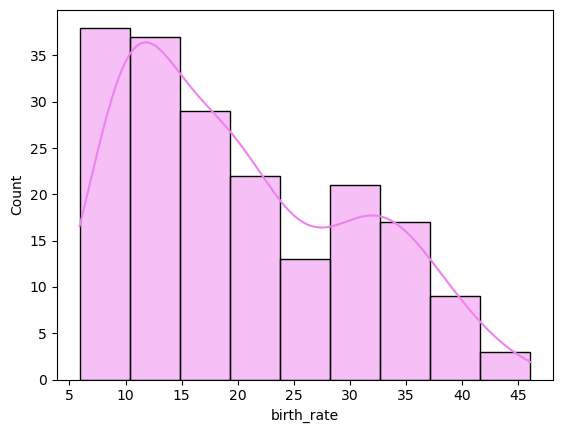

In [9]:
sns.histplot(x = "birth_rate", data = df, color = "violet", kde= True);

La mayoría de los países tienen una tasa de natalidad baja (primeras barras).

**2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.**

Text(0.5, 1.0, 'Mortalidad Infantil VS Esperanza de vida')

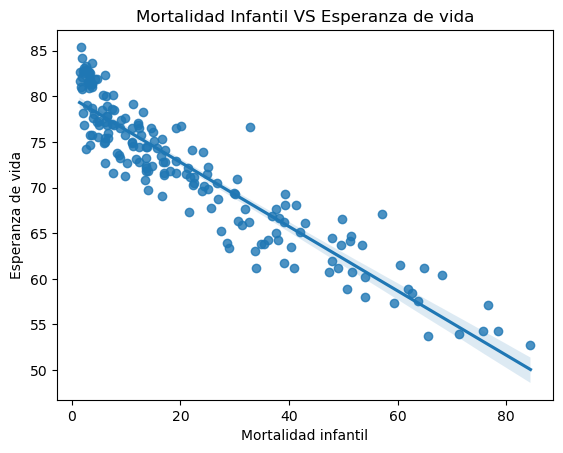

In [11]:
sns.regplot(x = "infant_mortality", 
                y = "life_expectancy", 
                data = df)
plt.xlabel("Mortalidad infantil")
plt.ylabel("Esperanza de vida");
plt.title("Mortalidad Infantil VS Esperanza de vida")

La esperanza de vida disminuye conforme aumenta la mortalidad infantil

**3. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.**

<Axes: xlabel='life_expectancy'>

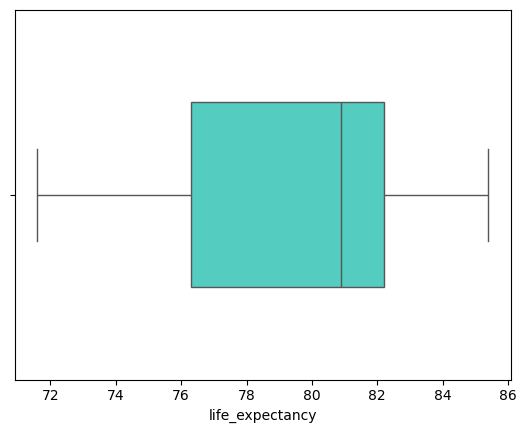

In [13]:
sns.boxplot(x= df[df['continent']=='Europe']['life_expectancy'], 
            data = df, 
            width = 0.5, 
            color = "turquoise")

In [15]:
df[df['continent']=='Europe']['life_expectancy'].describe()

count    43.000000
mean     79.202326
std       3.621266
min      71.600000
25%      76.300000
50%      80.900000
75%      82.200000
max      85.400000
Name: life_expectancy, dtype: float64

Mediana = 80.9
Rango intercuartil = 5.9 (de 76.3 a 82.2)
5.9 * 1,5 = valor a restar a Q1 y sumar a Q3 para hallar los bigotes

**4. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.**

<Axes: xlabel='birth_rate', ylabel='urban_population'>

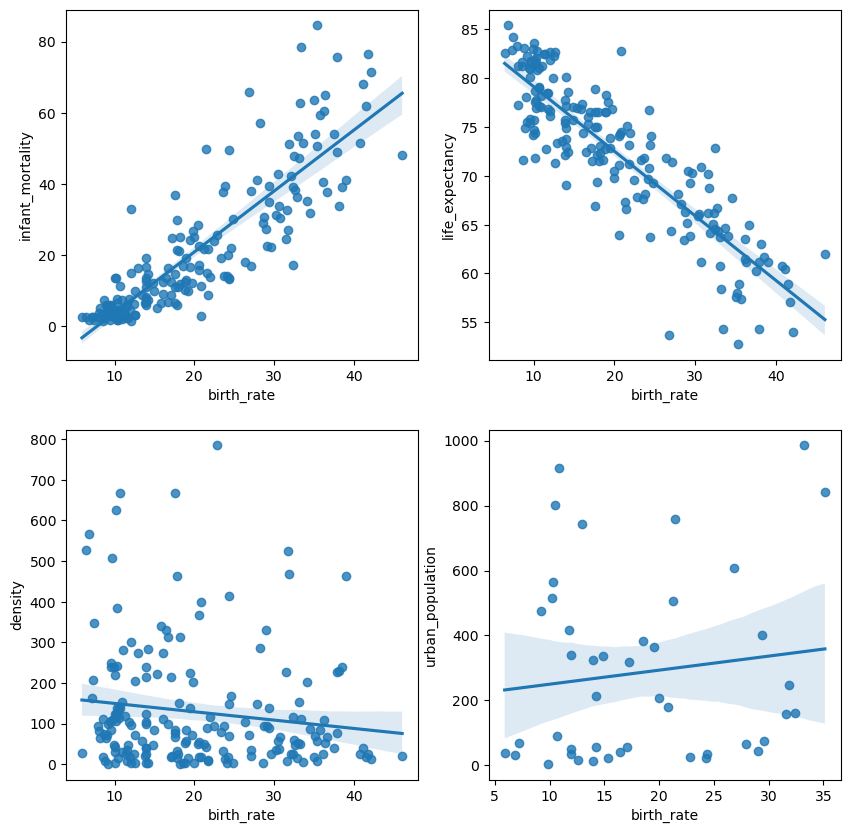

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.regplot(x = "birth_rate", 
                y = "infant_mortality", 
                data = df,
                ax= axes[0][0])
sns.regplot(x = "birth_rate", 
                y = "life_expectancy", 
                data = df,
                ax= axes[0][1])
sns.regplot(x = "birth_rate", 
                y = "density", 
                data = df,
                ax= axes[1][0])
sns.regplot(x = "birth_rate", 
                y = "urban_population", 
                data = df,
                ax= axes[1][1])

<Axes: xlabel='infant_mortality', ylabel='continent'>

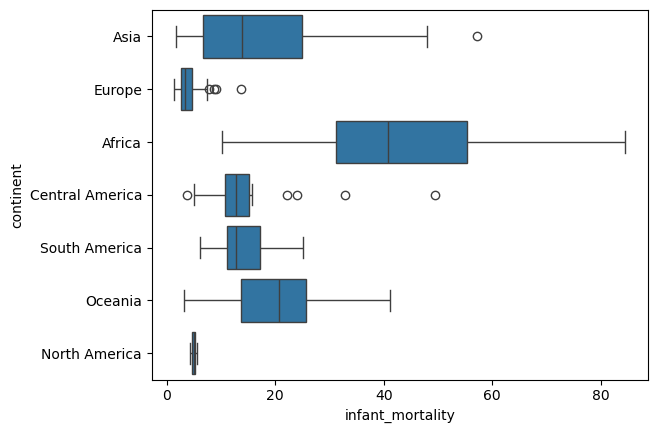

In [ ]:
sns.boxplot(x = "infant_mortalite", 
                y = "continent", 
                data = df)

<Axes: xlabel='infant_mortality', ylabel='gdp'>

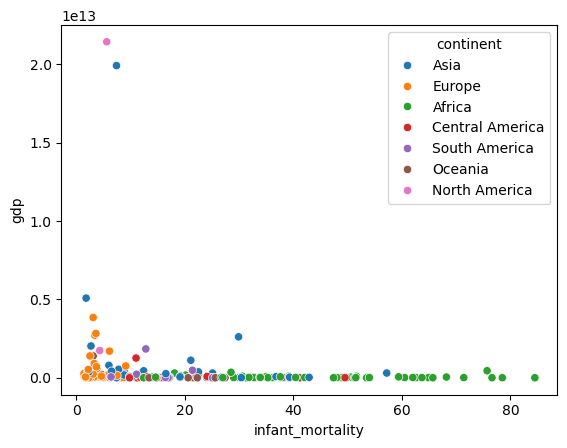

In [30]:
sns.scatterplot(x = "infant_mortality", 
                y = "gdp",
                hue= 'continent', 
                data = df)